# 목적 : 리뷰로부터 인사이트를 얻고, 감성분석을 해본다

# DATA OVERVIEW

- 데이터셋은 아마존의 알렉사 제품에 대한, 3000개의 리뷰로 되어있습니다.
- 컬럼은 rating,	date,	variation(제품모델),	verified_reviews,	feedback
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews


# 실습 1. 패키지 설치

프로젝트를 위해, 아나콘다 프롬프트를 실행하고, 다음을 인스톨 하세요.

conda install -c conda-forge wordcloud

## IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb  
%matplotlib inline

# 실습 2. pandas로 파일 읽기 - 탭으로 되어 있는 tsv 파일 읽기

In [2]:
df = pd.read_csv('data/amazon_alexa.tsv', sep='\t')
                                # sep 세퍼레이터 분리

In [3]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# 실습 3. verified_reviews 컬럼의 내용이 어떤지 확인해 보세요

In [4]:
df['verified_reviews'][6]

'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.'

# 실습 4. 피드백은 0과 1로 되어있습니다. 1은 긍정, 0은 부정입니다.  긍정 리뷰와 부정리뷰의 갯수를 그래프로 나타내세요.

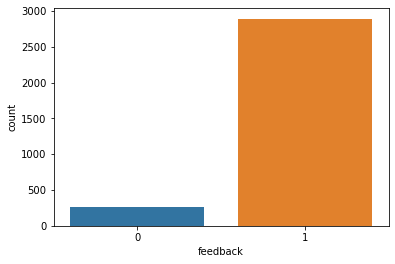

In [5]:
sb.countplot(data = df , x = 'feedback')
plt.show()

In [6]:
df['feedback'] == 1

0       True
1       True
2       True
3       True
4       True
        ... 
3145    True
3146    True
3147    True
3148    True
3149    True
Name: feedback, Length: 3150, dtype: bool

In [7]:
(df['feedback'] == 1).sum()

2893

In [8]:
(df['feedback'] == 0).sum()

257

In [9]:
df.loc[df['feedback'] == 0 , ].sum()

rating                                                            353
date                30-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-182...
variation           Charcoal Fabric Charcoal Fabric Charcoal Fabri...
verified_reviews    It's like Siri, in fact, Siri answers more acc...
feedback                                                            0
dtype: object

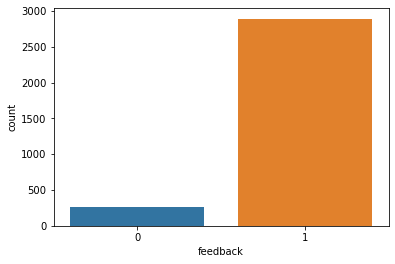

In [10]:
sb.countplot(data = df , x = df['feedback'])
plt.show()

In [11]:
df['feedback'].shape

(3150,)

# 실습 5. rating 은 0 ~ 5로 되어있습니다. 유저의 별점(rationg) 별 리뷰갯수를 그래프로 나타내세요.

In [12]:
df.shape

(3150, 5)

<AxesSubplot:xlabel='rating', ylabel='count'>

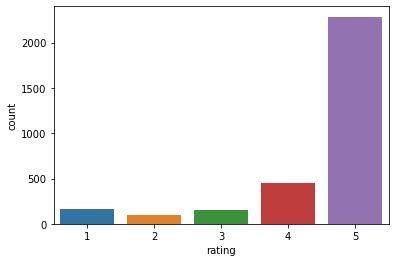

In [13]:
sb.countplot(data = df , x = 'rating')

In [14]:
my_order = df['rating'].value_counts().index

<AxesSubplot:xlabel='rating', ylabel='count'>

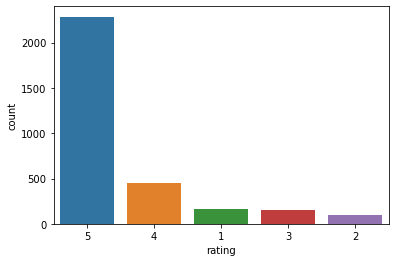

In [15]:
sb.countplot(data = df , x = 'rating', order= my_order)

# WORD CLOUD 사용하여, 유저들이 어떤 단어를 많이 사용하였는지 시각화 해봅니다. 

# 실습 1. 먼저 WORD CLOUD 를 이용하기 위해서, verified_reviews 를 하나의 문자열로 만들겠습니다.

## 실습 1-1. verified_reviews 를 하나의 리스트로 만듭니다.

In [16]:
# 외부라이브러리인데 위에서 아나콘다 설치할때 됨

In [17]:
review_list = df['verified_reviews'].to_list()

In [18]:
review_list

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

## 실습 1-2. 위의 words 리스트를, " " (공백) 으로 합쳐서, 하나의 문자열로 만듭니다.

In [19]:
reviews = ''.join(review_list)

In [20]:
reviews

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

## 실습 2. WordCloud 를 이용하여, 화면에 많이 나온 단어들을 시각화 합니다.

In [21]:
from wordcloud import WordCloud, STOPWORDS
                                # 불용어

In [22]:
### 불용어 (STOPWORDS) 처리 ###
# 필요 없는 단어를 불용어 라고 한다.
# 필요 없는 단어는, 상황에 따라 다르므로, 각 상황에 따른 불용어를 처리한다.

In [23]:
my_stopwords = STOPWORDS

In [24]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [25]:
my_stopwords.add('Alexa')

In [26]:
my_stopwords

{'Alexa',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',

In [27]:
# 배경색이나, 불용어를 처리하도록 한다.
wc = WordCloud(background_color='white', stopwords=my_stopwords)

In [28]:
wc.generate(reviews)

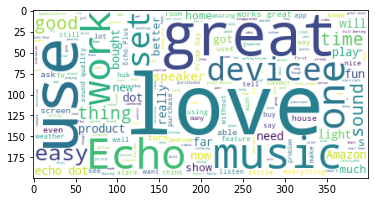

In [29]:
plt.imshow(wc)
plt.show()

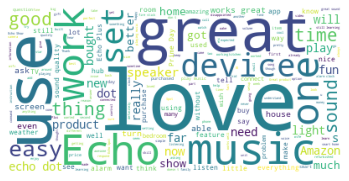

In [30]:
plt.imshow(wc)
plt.axis('off')
plt.show()

# 실습 3. Data Cleaning 과 Feature Engineering

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


In [32]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [33]:
# 글자를 숫자로 => vectorizing  => 숫자를 센다 => count vectorizing

In [34]:
vec = CountVectorizer()

In [36]:
vec.fit_transform( df['verified_reviews'] )
# vec의 fit = 여기에 있는 단어들 다 뽑아서 컬럼으로 만들어라

# 리뷰에 쓰인 단어가 4044개 있다

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [38]:
count_vec = vec.fit_transform( df['verified_reviews'] )

In [40]:
count_vec.shape

(3150, 4044)

In [41]:
count_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
vec.get_feature_names()

['00',
 '000',
 '07',
 '10',
 '100',
 '100x',
 '11',
 '1100sf',
 '12',
 '129',
 '12am',
 '15',
 '150',
 '18',
 '19',
 '1964',
 '1990',
 '1gb',
 '1rst',
 '1st',
 '20',
 '200',
 '2000',
 '2017',
 '229',
 '23',
 '24',
 '25',
 '29',
 '2nd',
 '2package',
 '30',
 '300',
 '30pm',
 '34',
 '360',
 '39',
 '3rd',
 '3x',
 '3xs',
 '40',
 '45',
 '48',
 '4am',
 '4ghz',
 '4k',
 '4th',
 '50',
 '54',
 '5am',
 '5ghz',
 '5th',
 '600',
 '62',
 '672',
 '6th',
 '70',
 '75',
 '79',
 '80',
 '80s',
 '81',
 '83',
 '85',
 '88',
 '888',
 '8gb',
 '90',
 '91',
 '911',
 '99',
 '_specifically_',
 'a1',
 'a19',
 'abay',
 'abc',
 'abd',
 'abilities',
 'ability',
 'able',
 'abode',
 'about',
 'above',
 'absolutely',
 'absolutly',
 'ac',
 'accent',
 'acceptable',
 'accepting',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessories',
 'accesss',
 'accident',
 'accidentally',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accu

In [44]:
len(vec.get_feature_names())

4044

In [46]:
review_array = count_vec.toarray()

In [47]:
review_array[0 , ]
# 넘파이 데이터 억세스

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
df['verified_reviews'][0]

'Love my Echo!'

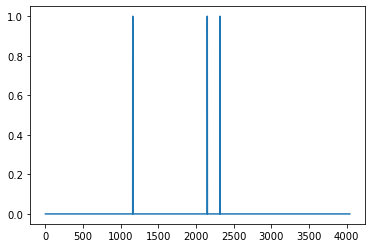

In [49]:
plt.plot(review_array[0 , ])
plt.show()

In [56]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [57]:
review_array[2 , ]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

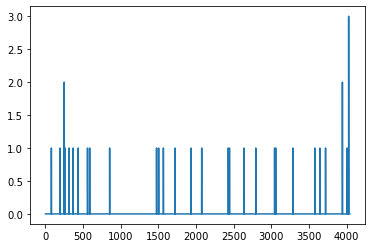

In [55]:
plt.plot(review_array[2 , ])
plt.show()

# you가 3개 쓰여서 3자리가 you일 것이다

## 데이터 비주얼라이징 - 리뷰길이(글자수)와 별점의 관계를 히트맵으로 나타내세요.

In [58]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [73]:
df['verified_reviews'].apply( len )
                #apply 안에 있는 함수에 데이터를 다 가져와서 적용하라

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: verified_reviews, Length: 3150, dtype: int64

In [63]:
df['verified_reviews'].str.len()

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: verified_reviews, Length: 3150, dtype: int64

In [77]:
df['len'] = df['verified_reviews'].str.len()

In [78]:
df.head()

,rating,date,variation,verified_reviews,feedback,reviews_len,len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,5


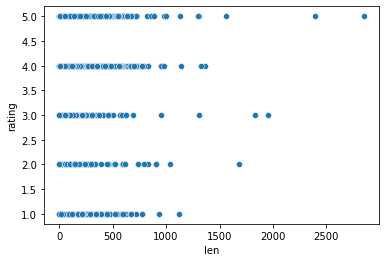

In [81]:
sb.scatterplot(data= df, x='len', y='rating')
plt.show()

# 데이터가 얼마나 겹쳤는지 파악이 안됨
# 그래서 히트맵으로 한다

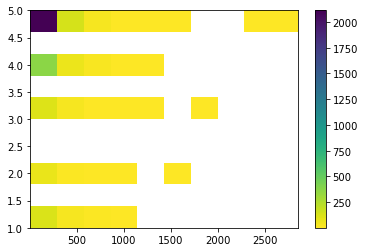

In [87]:
plt.hist2d(data= df, x = 'len', y = 'rating', cmin = 0.5  , cmap='viridis_r')
# hist2d 히스토그램 투디

plt.colorbar()
plt.show()

In [89]:
df[ ['len', 'rating'] ].corr()

# 이정도면 별 관계없음으로 할수있다

,len,rating
len,1.000000,-0.193067
rating,-0.193067,1.000000


In [90]:
# 리뷰를 가장 길게 쓴 사람은 별점 몇점 줬습니까?
df

,rating,date,variation,verified_reviews,feedback,reviews_len,len
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,5
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,380


In [94]:
df.loc[ df['len'] == df['len'].max() , ]

,rating,date,variation,verified_reviews,feedback,reviews_len,len
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851,2851


In [96]:
df_min = df.loc[ df['len'] == df['len'].min() , ]

In [98]:
df_min['rating'].value_counts()

5    42
1    15
3    12
4     8
2     4
Name: rating, dtype: int64

## 데이터 비주얼라이징 - 리뷰길이를 히스토그램으로 확인하세요.

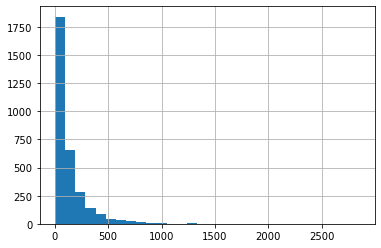

In [107]:
df['len'].hist(bins = 30)
    # 판다스 데이터프레임에서 hist 가능
plt.show()

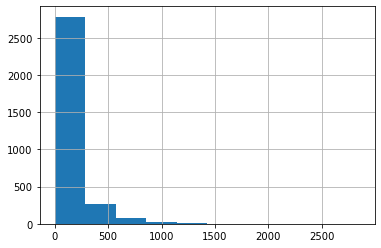

In [108]:
df['len'].hist()
    # 판다스 데이터프레임에서 hist 가능
plt.show()

### 리뷰길이가 가장 작인 리뷰의 내용을 확인하세요. 그리고 가장 긴 리뷰도 내용을 확인하세요.